## Neural Network from scratch
#### XOR operation using a Feed Forward Neural Network(Single Hidden Layer) with backpropagation

In [188]:
# Import required libraries
import numpy as np
import math
from matplotlib import pyplot as plt

In [297]:
# Input dataset for XOR operation
X = np.array([ [1, 1, 1], [1, 0, 1], [0, 1, 1],[0, 0, 1] ]) # 1 for bias

# Output class
Y = np.array([[0],[1],[1],[0]])

# single hidden layer, number of nodes
hidden_layer_nodes = 3

# Learning rate
#alpha = 0.6 # logistic
alpha=0.01 #- for tanh and related
#alpha=0.9 # relu

# Epoch
epoch = 10000

# Convergence
covergence_threshold = 0.001

# weights
# here weights are initialized by normal distribution
w01 = np.random.normal(0, 1, len(X[0])*hidden_layer_nodes).reshape(len(X[0]),hidden_layer_nodes) # zero mean, unit variance
w12 = np.random.normal(0, 1, hidden_layer_nodes*1).reshape(hidden_layer_nodes,1) # one output node

In [232]:
def golden_ratio(i):
    ratio = (1 + math.sqrt(5)) / 2
    return int(ratio ** i / math.sqrt(5) + 0.5)

In [296]:
PI = float(format(np.pi, '.20f'))

In [278]:
# Define Activation Functions

##########
# tanh
##########
def tanh(x):
    return np.tanh(x)
def tanh_derivative(x):
    return (1.0 - np.tanh(x)**2)

##########
# pi-tanh
##########
def pitanh(x):
    return np.tanh(x)
def pitanh_derivative(x):
    return PI*(1.0 - np.tanh(x)**2)

####################
# gr-tanh
####################
def grtanh(x):
    return np.tanh(x)
def grtanh_derivative(x,i):
    return golden_ratio(i)*(1.0 - np.tanh(x)**2)

##########
# sigmoid
##########
def logistic(x):
    return 1/(1 + np.exp(-x))
def logistic_derivative(x):
    return logistic(x)*(1-logistic(x))

##########
# relu
##########
def relu(x):
    return x * (x > 0)
def relu_derivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

##########
# leaky relu
##########
def lrelu(x):
    return x * (x > 0)
def lrelu_derivative(x):
    x[x<=0] = 0.01
    x[x>0] = 1
    return x

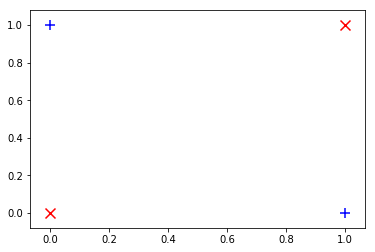

In [4]:
# plot the data
for index, row in enumerate(X):
    if index == 0 or index == 3:
        plt.scatter(row[0], row[1], marker='x', s=100, color='red')
    else:
        plt.scatter(row[0], row[1],marker='+', s=100, color='blue')

##### Training the NN and plotting the loss across epoch

In [298]:
cost_error_array = []
for i in range(1,epoch):
    # Forward Pass
    # from input to hidden
    z_h = np.dot(X, w01)
    a_h = pitanh(z_h)

    # from hidden to output
    z_o = np.dot(a_h, w12)
    a_o = pitanh(z_o)

    # print intermediate results
    print("Prediction in epoch: " + str(i))
    print(a_o)
    # Calculating the error
    a_o_error = (1/2)*np.sum((np.power((a_o - Y), 2)))
    print("Error in epoch: " + str(i))
    print(a_o_error)
    cost_error_array.append(a_o_error)
#    if a_o_error <= covergence_threshold:
#        print("Reached convergence...exiting.")
#        break
    
    # Backpropagation
    delta_a_o_error = a_o - Y
    #delta_z_o = grtanh_derivative(a_o,(epoch-i)%10)
    delta_z_o = pitanh_derivative(a_o)
    delta_w12 = a_h
    delta_output_layer = np.dot(delta_w12.T,(delta_a_o_error * delta_z_o))
    
    delta_a_h = np.dot(delta_a_o_error * delta_z_o, w12.T)
    #delta_z_h = grtanh_derivative(a_h,(epoch-i)%10)
    delta_z_h = pitanh_derivative(a_h)
    delta_w01 = X
    delta_hidden_layer = np.dot(delta_w01.T, delta_a_h * delta_z_h)
    
    #Update the weights
    w01 = w01 - alpha*delta_hidden_layer
    w12 = w12 - alpha*delta_output_layer

Prediction in epoch: 1
[[0.98708366]
 [0.40516767]
 [0.99004603]
 [0.36351415]]
Error in epoch: 1
0.7302006410375054
Prediction in epoch: 2
[[0.97941965]
 [0.3591433 ]
 [0.98257048]
 [0.2587896 ]]
Error in epoch: 2
0.7186180043395382
Prediction in epoch: 3
[[0.96934761]
 [0.36535031]
 [0.97084129]
 [0.20382553]]
Error in epoch: 3
0.6924050492773737
Prediction in epoch: 4
[[0.95308118]
 [0.36982013]
 [0.95129338]
 [0.16263735]]
Error in epoch: 4
0.6671568228457817
Prediction in epoch: 5
[[0.92775972]
 [0.37426993]
 [0.92049365]
 [0.13463165]]
Error in epoch: 5
0.6383615812033521
Prediction in epoch: 6
[[0.89141021]
 [0.38111267]
 [0.87642108]
 [0.11958835]]
Error in epoch: 6
0.6036034072192061
Prediction in epoch: 7
[[0.8451168 ]
 [0.39232028]
 [0.82117474]
 [0.11737526]]
Error in epoch: 7
0.5646262351771594
Prediction in epoch: 8
[[0.79379416]
 [0.4083225 ]
 [0.76163574]
 [0.12712719]]
Error in epoch: 8
0.5265851358295002
Prediction in epoch: 9
[[0.74377741]
 [0.42763605]
 [0.70607247]

##### Logistic Activation Function

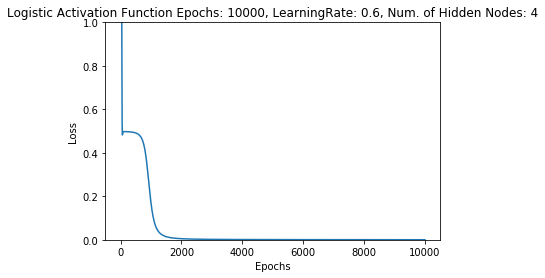

Weights:
Input to Hidden Layer: [[ -2.40400411  12.60817337  -1.42897453  21.4595374 ]
 [  7.1647845  -15.890272    -1.16658064  -8.01260252]
 [ 18.84119051   2.17317557   2.46783656 -21.70322739]]
Hidden Layer to Output: [[ -9.9682846 ]
 [-12.36204616]
 [ 18.06911532]
 [ 30.11870201]]


In [125]:
plt.plot(np.arange(1,epoch),cost_error_array)
plt.ylim(0,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(str('Logistic Activation Function ') + str('Epochs: ' + str(epoch) + ', LearningRate: '+str(alpha) +', Num. of Hidden Nodes: '+str(hidden_layer_nodes)))
plt.show()
print("Weights:")
print("Input to Hidden Layer: " + str(w01))
print("Hidden Layer to Output: " + str(w12))

##### TanH Activation Function

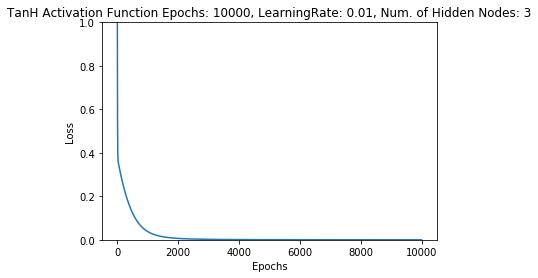

Weights:
Input to Hidden Layer: [[ 1.67764718  1.5716218   1.28573173]
 [-0.92999539  1.02926218  1.77276282]
 [-1.55677611 -1.98779305 -0.51223542]]
Hidden Layer to Output: [[ 1.50613289]
 [-2.65492315]
 [ 2.4925882 ]]


In [142]:
plt.plot(np.arange(1,epoch),cost_error_array)
plt.ylim(0,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(str('TanH Activation Function ') + str('Epochs: ' + str(epoch) + ', LearningRate: '+str(alpha) +', Num. of Hidden Nodes: '+str(hidden_layer_nodes)))
plt.show()
print("Weights:")
print("Input to Hidden Layer: " + str(w01))
print("Hidden Layer to Output: " + str(w12))

##### A new variation - PiTanH Activation Function
Seems to converge faster than TanH

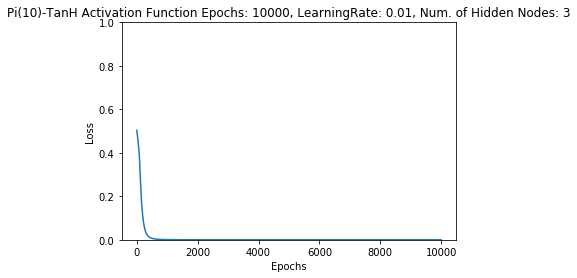

Weights:
Input to Hidden Layer: [[ 2.19120212  1.85918411 -0.52944586]
 [ 2.05319813  1.96278029  0.08314931]
 [-0.87496555 -2.88848914 -0.77393529]]
Hidden Layer to Output: [[ 2.76747167]
 [-2.61721229]
 [ 1.00492093]]


In [287]:
plt.plot(np.arange(1,epoch),cost_error_array)
plt.ylim(0,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(str('Pi(10)-TanH Activation Function ') + str('Epochs: ' + str(epoch) + ', LearningRate: '+str(alpha) +', Num. of Hidden Nodes: '+str(hidden_layer_nodes)))
plt.show()
print("Weights:")
print("Input to Hidden Layer: " + str(w01))
print("Hidden Layer to Output: " + str(w12))

##### Different precision of Pi - 15,20

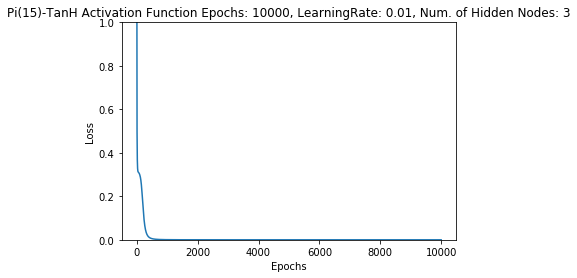

Weights:
Input to Hidden Layer: [[ 2.18371576 -1.59596752  1.68379115]
 [ 1.81117625 -1.92086515 -0.66737181]
 [-0.76789957  2.69921816  0.85990951]]
Hidden Layer to Output: [[ 2.88865253]
 [ 2.67529917]
 [-1.12819533]]


In [294]:
plt.plot(np.arange(1,epoch),cost_error_array)
plt.ylim(0,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(str('Pi(15)-TanH Activation Function ') + str('Epochs: ' + str(epoch) + ', LearningRate: '+str(alpha) +', Num. of Hidden Nodes: '+str(hidden_layer_nodes)))
plt.show()
print("Weights:")
print("Input to Hidden Layer: " + str(w01))
print("Hidden Layer to Output: " + str(w12))

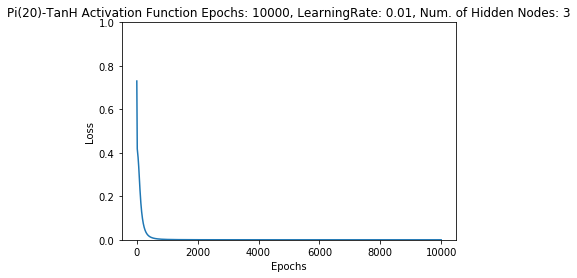

Weights:
Input to Hidden Layer: [[-0.87094723  1.6789499  -3.3883634 ]
 [ 1.96292031  2.74692745 -0.07507091]
 [ 0.14162375 -0.4155923   2.15906284]]
Hidden Layer to Output: [[-2.65075336]
 [ 3.94617765]
 [ 1.9772921 ]]


In [299]:
plt.plot(np.arange(1,epoch),cost_error_array)
plt.ylim(0,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(str('Pi(20)-TanH Activation Function ') + str('Epochs: ' + str(epoch) + ', LearningRate: '+str(alpha) +', Num. of Hidden Nodes: '+str(hidden_layer_nodes)))
plt.show()
print("Weights:")
print("Input to Hidden Layer: " + str(w01))
print("Hidden Layer to Output: " + str(w12))

##### A new variation - GoldenRatio TanH Activation Function

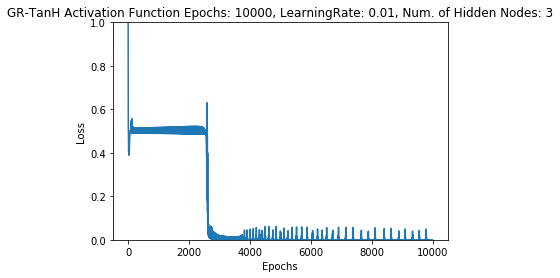

Weights:
Input to Hidden Layer: [[ -23.26545125   -5.81570968 -266.37533438]
 [  23.75617371    6.09667022  106.20093049]
 [  -2.3720925     1.68440696 -151.05244055]]
Hidden Layer to Output: [[ 1.86255923]
 [-1.8505437 ]
 [-3.5579354 ]]


In [268]:
plt.plot(np.arange(1,epoch),cost_error_array)
plt.ylim(0,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(str('GR-TanH Activation Function ') + str('Epochs: ' + str(epoch) + ', LearningRate: '+str(alpha) +', Num. of Hidden Nodes: '+str(hidden_layer_nodes)))
plt.show()
print("Weights:")
print("Input to Hidden Layer: " + str(w01))
print("Hidden Layer to Output: " + str(w12))

##### ReLU Activation Function
Not suitable for single hidden layer

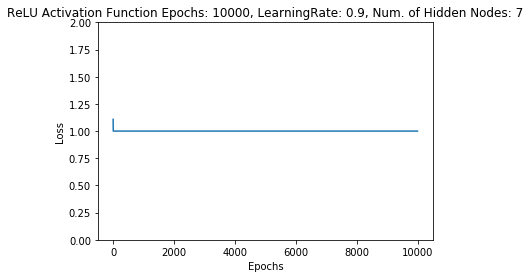

Weights:
Input to Hidden Layer: [[ 0.5386498  -1.42191689 -0.22284587  0.47645299 -0.75142151 -0.82326381
  -0.56456466]
 [ 0.37345353 -0.50204205 -0.49645332 -0.0471798  -2.08676522  0.10948302
  -1.68944228]
 [-0.45779912 -0.81653783  0.44176758 -0.43538725  0.63488181 -0.38218444
  -2.1925688 ]]
Hidden Layer to Output: [[-0.78177702]
 [ 0.26736151]
 [-0.0117439 ]
 [-0.91807493]
 [-1.00025615]
 [-0.37690269]
 [ 1.83228858]]


In [272]:
plt.plot(np.arange(1,epoch),cost_error_array)
plt.ylim(0,2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(str('ReLU Activation Function ') + str('Epochs: ' + str(epoch) + ', LearningRate: '+str(alpha) +', Num. of Hidden Nodes: '+str(hidden_layer_nodes)))
plt.show()
print("Weights:")
print("Input to Hidden Layer: " + str(w01))
print("Hidden Layer to Output: " + str(w12))